In [3]:
import pandas as pd
import numpy as np

import scipy.sparse
from scipy.sparse import hstack

In [ ]:
train = hstack([scipy.sparse.load_npz('D:/data/train_tsd_tfidf20000.npz'), 
                scipy.sparse.load_npz('D:/data/train_tst_tfidf2000.npz')])

In [6]:
train.shape

(1503424, 22000)

** Linear base stem **

In [4]:
y = pd.read_csv('D:/train.csv')['deal_probability']

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
model = LinearRegression(normalize=True)

In [7]:
%time model.fit(train, y)

Wall time: 9min 37s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [14]:
#del train

test = hstack([scipy.sparse.load_npz('D:/data/test_tsd_tfidf20000.npz'), 
                scipy.sparse.load_npz('D:/data/test_tst_tfidf2000.npz')])
pred = model.predict(test)

pred[pred < 0] = 0
pred[pred > 1] = 1

label = pd.read_csv('D:/test.csv')['item_id']

df = pd.DataFrame()
df['item_id'] = label.values
df['deal_probability'] = pred

df.to_csv('2_linear22.csv',index=False)

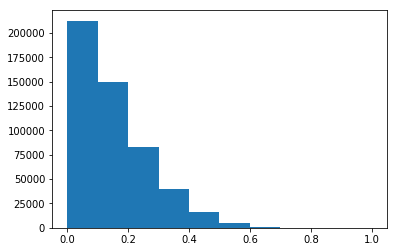

In [16]:
import matplotlib.pyplot as plt
plt.hist(pred)
plt.show()

** Linear base lemma **

In [3]:
train = hstack([scipy.sparse.load_npz('D:/data/train_td_tfidf20000.npz'), 
                scipy.sparse.load_npz('D:/data/train_tt_tfidf2000.npz')])
y = pd.read_csv('D:/train.csv')['deal_probability']
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
%time model.fit(train, y)

Wall time: 12min 41s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [4]:
#del train

test = hstack([scipy.sparse.load_npz('D:/data/test_td_tfidf20000.npz'), 
                scipy.sparse.load_npz('D:/data/test_tt_tfidf2000.npz')])
pred = model.predict(test)

pred[pred < 0] = 0
pred[pred > 1] = 1

label = pd.read_csv('D:/test.csv')['item_id']

df = pd.DataFrame()
df['item_id'] = label.values
df['deal_probability'] = pred

df.to_csv('3_linear22_lemma.csv',index=False)

** Select **

In [ ]:
train = hstack([scipy.sparse.load_npz('D:/data/train_td_tfidf20000.npz'), 
                scipy.sparse.load_npz('D:/data/train_tt_tfidf2000.npz')])

In [6]:
from sklearn.feature_selection import SelectFromModel
select = SelectFromModel(model, threshold=0.11, prefit=True)

In [7]:
X = select.transform(train)
X.shape

(1503424, 8783)

In [8]:
scipy.sparse.save_npz('D:/data/train_short2.npz', X)

In [9]:
del X, train

In [10]:
test = hstack([scipy.sparse.load_npz('D:/data/test_td_tfidf20000.npz'), 
                scipy.sparse.load_npz('D:/data/test_tt_tfidf2000.npz')])

In [11]:
X = select.transform(test)
X.shape

(508438, 8783)

In [12]:
scipy.sparse.save_npz('D:/data/test_short2.npz', X)

In [4]:
train = hstack([scipy.sparse.load_npz('D:/data/train_short1.npz'), 
                scipy.sparse.load_npz('D:/data/train_short2.npz')]
              )
y = pd.read_csv('D:/train.csv')['deal_probability']

In [5]:
train.shape

(1503424, 14125)

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True, n_jobs = -1)
%time model.fit(train, y)

Wall time: 54min 20s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [7]:
#del train

test = hstack([scipy.sparse.load_npz('D:/data/test_short1.npz'), 
                scipy.sparse.load_npz('D:/data/test_short2.npz')])
pred = model.predict(test)

pred[pred < 0] = 0
pred[pred > 1] = 1

label = pd.read_csv('D:/test.csv')['item_id']

df = pd.DataFrame()
df['item_id'] = label.values
df['deal_probability'] = pred

df.to_csv('4_linear_joined.csv',index=False)

In [8]:
from sklearn.feature_selection import SelectFromModel

In [15]:
sfm = SelectFromModel(model, prefit=True, threshold=0.1)

In [16]:
train_short = sfm.transform(train)

In [17]:
train_short.shape

(1503424, 11632)

In [18]:
train_short = sfm.transform(train)
test_short = sfm.transform(test)

In [19]:
scipy.sparse.save_npz('D:/data/train_short.npz', train_short)
scipy.sparse.save_npz('D:/data/test_short.npz', test_short)

** Linear on POS **

In [3]:
train = hstack([scipy.sparse.load_npz('D:/data/train_pos_tfidf100.npz'), 
                scipy.sparse.load_npz('D:/data/train_type_tfidf200.npz')]
              )
y = pd.read_csv('D:/train.csv')['deal_probability']

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True, n_jobs = -1)
%time model.fit(train, y)

Wall time: 59.7 s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=True)

In [9]:
train.shape

NameError: name 'train' is not defined

In [14]:
scipy.sparse.load_npz('D:/data/test_pos_tfidf100.npz').shape

(325954, 100)

In [7]:
del train

test = hstack([scipy.sparse.load_npz('D:/data/test_pos_tfidf100.npz'), 
                scipy.sparse.load_npz('D:/data/test_type_tfidf200.npz')])
pred = model.predict(test)

pred[pred < 0] = 0
pred[pred > 1] = 1

label = pd.read_csv('D:/test.csv')['item_id']

df = pd.DataFrame()
df['item_id'] = label.values
df['deal_probability'] = pred

df.to_csv('5_linear_pos+type.csv',index=False)

ValueError: Length of values does not match length of index

# Ridge

In [1]:
from sklearn.linear_model import Ridge

In [5]:
train = hstack([scipy.sparse.load_npz('D:/data/train_td_tfidf20000.npz'), 
                scipy.sparse.load_npz('D:/data/train_tt_tfidf2000.npz')])
y = pd.read_csv('D:/train.csv')['deal_probability']
model = Ridge(copy_X=False, random_state=23)
%time model.fit(train, y)

Wall time: 1min 17s


Ridge(alpha=1.0, copy_X=False, fit_intercept=True, max_iter=None,
   normalize=False, random_state=23, solver='auto', tol=0.001)

In [6]:
del train

test = hstack([scipy.sparse.load_npz('D:/data/test_td_tfidf20000.npz'), 
                scipy.sparse.load_npz('D:/data/test_tt_tfidf2000.npz')])
pred = model.predict(test)

pred[pred < 0] = 0
pred[pred > 1] = 1

label = pd.read_csv('D:/test.csv')['item_id']

df = pd.DataFrame()
df['item_id'] = label.values
df['deal_probability'] = pred

df.to_csv('5_Ridge_lemma22.csv',index=False)

** FULL **

In [3]:
train = hstack([scipy.sparse.load_npz('D:/data/train_tsd_tfidf20000.npz'), 
                scipy.sparse.load_npz('D:/data/train_tst_tfidf2000.npz'),
                scipy.sparse.load_npz('D:/train12.npz')])

In [4]:
from sklearn.linear_model import Ridge
y = pd.read_csv('D:/train.csv')['deal_probability']
model = Ridge(normalize=True, copy_X=False, random_state=23)
%time model.fit(train, y)

Wall time: 40.4 s


Ridge(alpha=1.0, copy_X=False, fit_intercept=True, max_iter=None,
   normalize=True, random_state=23, solver='auto', tol=0.001)

In [5]:
model.n_iter_

array([14])

In [6]:
del train

test = hstack([scipy.sparse.load_npz('D:/data/test_td_tfidf20000.npz'), 
                scipy.sparse.load_npz('D:/data/test_tt_tfidf2000.npz'),
              scipy.sparse.load_npz('D:/test12.npz')])
pred = model.predict(test)

pred[pred < 0] = 0
pred[pred > 1] = 1

label = pd.read_csv('D:/test.csv')['item_id']

df = pd.DataFrame()
df['item_id'] = label.values
df['deal_probability'] = pred

df.to_csv('6_Ridge_lemma22+cat.csv',index=False)

In [2]:
train = hstack([scipy.sparse.load_npz('D:/data/train_tsd_tfidf20000.npz'), 
                scipy.sparse.load_npz('D:/data/train_tst_tfidf2000.npz'),
                scipy.sparse.load_npz('D:/train12.npz')])
from sklearn.linear_model import LinearRegression
y = pd.read_csv('D:/train.csv')['deal_probability']
model = LinearRegression(normalize=True, copy_X=False)
%time model.fit(train, y)
del train

test = hstack([scipy.sparse.load_npz('D:/data/test_td_tfidf20000.npz'), 
                scipy.sparse.load_npz('D:/data/test_tt_tfidf2000.npz'),
              scipy.sparse.load_npz('D:/test12.npz')])
pred = model.predict(test)

pred[pred < 0] = 0
pred[pred > 1] = 1

label = pd.read_csv('D:/test.csv')['item_id']

df = pd.DataFrame()
df['item_id'] = label.values
df['deal_probability'] = pred

df.to_csv('7_Ridge_lemma22+cat.csv',index=False)

Wall time: 6min 3s


In [ ]:
train = hstack([scipy.sparse.load_npz('D:/data/train_pos_tfidf100.npz'), 
                scipy.sparse.load_npz('D:/data/train_type_tfidf200.npz')])
from sklearn.linear_model import LinearRegression
y = pd.read_csv('D:/train.csv')['deal_probability']
model = LinearRegression(normalize=True, copy_X=False)
%time model.fit(train, y)
del train

test = hstack([scipy.sparse.load_npz('D:/data/test_pos_tfidf200.npz'), 
                scipy.sparse.load_npz('D:/data/test_type_tfidf200.npz')])
pred = model.predict(test)

pred[pred < 0] = 0
pred[pred > 1] = 1

label = pd.read_csv('D:/test.csv')['item_id']

df = pd.DataFrame()
df['item_id'] = label.values
df['deal_probability'] = pred

df.to_csv('8_Ridge_pos+type.csv',index=False)

In [ ]:
train = hstack([scipy.sparse.load_npz('D:/data/train_pos_tfidf100.npz'), 
                scipy.sparse.load_npz('D:/data/train_type_tfidf200.npz')])
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
y = pd.read_csv('D:/train.csv')['deal_probability']
alphas = list(np.logspace(-3, -1, 5))
model = RidgeCV(alphas=alphas, cv=5, normalize=True)
%time model.fit(train, y)
del train

test = hstack([scipy.sparse.load_npz('D:/data/test_pos_tfidf200.npz'), 
                scipy.sparse.load_npz('D:/data/test_type_tfidf200.npz')])
pred = model.predict(test)

pred[pred < 0] = 0
pred[pred > 1] = 1

label = pd.read_csv('D:/test.csv')['item_id']

df = pd.DataFrame()
df['item_id'] = label.values
df['deal_probability'] = pred

df.to_csv('8_Ridge_pos+type.csv',index=False)

In [2]:
train = hstack([scipy.sparse.load_npz('D:/data/train_pos_tfidf100.npz'), 
                scipy.sparse.load_npz('D:/data/train_type_tfidf200.npz')])
from sklearn.linear_model import LinearRegression
y = pd.read_csv('D:/train.csv')['deal_probability']
model = LinearRegression(normalize=True, copy_X=False)
%time model.fit(train, y)
del train

test = hstack([scipy.sparse.load_npz('D:/data/test_pos_tfidf200.npz'), 
                scipy.sparse.load_npz('D:/data/test_type_tfidf200.npz')])
pred = model.predict(test)

pred[pred < 0] = 0
pred[pred > 1] = 1

label = pd.read_csv('D:/test.csv')['item_id']

df = pd.DataFrame()
df['item_id'] = label.values
df['deal_probability'] = pred

df.to_csv('8_Linear_pos+type.csv',index=False)

Wall time: 36.3 s


In [ ]:
model.coef_

In [2]:
train = hstack([scipy.sparse.load_npz('D:/data/train_pos_tfidf200.npz'), 
                scipy.sparse.load_npz('D:/data/train_type_tfidf200.npz')])
from sklearn.linear_model import LinearRegression
y = pd.read_csv('D:/train.csv')['deal_probability']
model = LinearRegression(normalize=True, copy_X=False)
%time model.fit(train, y)
del train

test = hstack([scipy.sparse.load_npz('D:/data/test_pos_tfidf200.npz'), 
                scipy.sparse.load_npz('D:/data/test_type_tfidf200.npz')])
pred = model.predict(test)

pred[pred < 0] = 0
pred[pred > 1] = 1

label = pd.read_csv('D:/test.csv')['item_id']

df = pd.DataFrame()
df['item_id'] = label.values
df['deal_probability'] = pred

df.to_csv('9_Linear_pos+type200.csv',index=False)

Wall time: 1min 13s


In [2]:
train = hstack([scipy.sparse.load_npz('D:/data/train_pos_tfidf200.npz'), 
                scipy.sparse.load_npz('D:/data/train_type_tfidf200.npz')])
from sklearn.linear_model import Ridge
y = pd.read_csv('D:/train.csv')['deal_probability']
model = Ridge(normalize=True, copy_X=False, random_state=23)
%time model.fit(train, y)
del train

test = hstack([scipy.sparse.load_npz('D:/data/test_pos_tfidf200.npz'), 
                scipy.sparse.load_npz('D:/data/test_type_tfidf200.npz')])
pred = model.predict(test)

pred[pred < 0] = 0
pred[pred > 1] = 1

label = pd.read_csv('D:/test.csv')['item_id']

df = pd.DataFrame()
df['item_id'] = label.values
df['deal_probability'] = pred

df.to_csv('10_Ridge_pos+type200.csv',index=False)

Wall time: 34.8 s


In [2]:
train = hstack([scipy.sparse.load_npz('D:/data/train_pos_tfidf200.npz'), 
                scipy.sparse.load_npz('D:/data/train_type_tfidf200.npz'),
               scipy.sparse.load_npz('D:/data/train_td_tfidf20000.npz'), 
                scipy.sparse.load_npz('D:/data/train_tt_tfidf2000.npz'),
                scipy.sparse.load_npz('D:/train12.npz')])
from sklearn.linear_model import LinearRegression
y = pd.read_csv('D:/train.csv')['deal_probability']
model = LinearRegression(normalize=True, copy_X=False)
%time model.fit(train, y)
del train

test = hstack([scipy.sparse.load_npz('D:/data/test_pos_tfidf200.npz'), 
                scipy.sparse.load_npz('D:/data/test_type_tfidf200.npz'),
              scipy.sparse.load_npz('D:/data/test_td_tfidf20000.npz'), 
                scipy.sparse.load_npz('D:/data/test_tt_tfidf2000.npz'),
              scipy.sparse.load_npz('D:/test12.npz')])
pred = model.predict(test)

pred[pred < 0] = 0
pred[pred > 1] = 1

label = pd.read_csv('D:/test.csv')['item_id']

df = pd.DataFrame()
df['item_id'] = label.values
df['deal_probability'] = pred

df.to_csv('9_Linear_pos+type200.csv',index=False)

Wall time: 19min 2s


** New data **

In [1]:
import scipy.sparse
import pandas as pd

In [2]:
train = scipy.sparse.load_npz('D:/data/train.npz')

from sklearn.linear_model import LinearRegression
y = pd.read_csv('D:/train.csv')['deal_probability']
model = LinearRegression(normalize=True, copy_X=False)
%time model.fit(train, y)
del train

test = scipy.sparse.load_npz('D:/data/test.npz')

pred = model.predict(test)

pred[pred < 0] = 0
pred[pred > 1] = 1

label = pd.read_csv('D:/test.csv')['item_id']

df = pd.DataFrame()
df['item_id'] = label.values
df['deal_probability'] = pred

df.to_csv('12_Linear_joined.csv',index=False)

Wall time: 1h 3min 56s


** XGBoost **

In [1]:
import xgboost

In [2]:
import scipy.sparse
#train = scipy.sparse.load_npz('D:/data/train.npz')
train = scipy.sparse.hstack([scipy.sparse.load_npz('D:/data/train_pos_tfidf200.npz'), 
                scipy.sparse.load_npz('D:/data/train_type_tfidf200.npz')])

In [3]:
import pandas as pd
y = pd.read_csv('D:/train.csv')['deal_probability']

In [8]:
xgb = xgboost.XGBRegressor(eval_metric='rmse',
                           n_estimators=100, 
                           learning_rate=0.08, 
                           #gamma=0, 
                           subsample=0.1,
                           #colsample_bytree=1, 
                           objective='reg:logistic',
                          verbose_eval=5,
                          random_state=23,
                          n_jobs=3)#,
                           #max_depth=7)

In [9]:
xgb

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='rmse', gamma=0, learning_rate=0.08,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=3, nthread=None, objective='reg:logistic',
       random_state=23, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.1, verbose_eval=5)

In [10]:
%time xgb.fit(train, y)

Wall time: 16min 21s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='rmse', gamma=0, learning_rate=0.08,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=3, nthread=None, objective='reg:logistic',
       random_state=23, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.1, verbose_eval=5)

In [12]:
del train

In [14]:
test = scipy.sparse.hstack([scipy.sparse.load_npz('D:/data/test_pos_tfidf200.npz'), 
                scipy.sparse.load_npz('D:/data/test_type_tfidf200.npz')])
pred = xgb.predict(test)

pred[pred < 0] = 0
pred[pred > 1] = 1

label = pd.read_csv('D:/test.csv')['item_id']

df = pd.DataFrame()
df['item_id'] = label.values
df['deal_probability'] = pred

df.to_csv('11_xgb_pos+type.csv',index=False)

In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
import scipy.sparse
import pandas as pd

In [ ]:
train = scipy.sparse.load_npz('D:/data/train.npz')
y = pd.read_csv('D:/train.csv')['deal_probability']
kbest = SelectKBest(mutual_info_regression, k=2000)
%time train = kbest.fit_transform(train, y)

In [1]:
import xgboost
import scipy.sparse
train = scipy.sparse.load_npz('D:/data/train.npz')
#train = scipy.sparse.hstack([scipy.sparse.load_npz('D:/data/train_pos_tfidf200.npz'), 
#                scipy.sparse.load_npz('D:/data/train_type_tfidf200.npz')])
import pandas as pd
y = pd.read_csv('D:/train.csv')['deal_probability']
xgb = xgboost.XGBRegressor(eval_metric='rmse',
                           n_estimators=100, 
                           learning_rate=0.08, 
                           #gamma=0, 
                           subsample=0.1,
                           colsample_bytree=0.01, 
                           objective='reg:logistic',
                          verbose_eval=5,
                          random_state=23,
                          n_jobs=3)#,
                           #max_depth=7)

In [ ]:
%time xgb.fit(train, y)

del train
test = scipy.sparse.load_npz('D:/data/test.npz')
pred = xgb.predict(test)

pred[pred < 0] = 0
pred[pred > 1] = 1

label = pd.read_csv('D:/test.csv')['item_id']

df = pd.DataFrame()
df['item_id'] = label.values
df['deal_probability'] = pred

df.to_csv('11_xgb_pos+type.csv',index=False)

In [ ]:
from sklearn.model_selection import train_test_split

import xgboost
import scipy.sparse
#train = scipy.sparse.load_npz('D:/data/train.npz')
train = scipy.sparse.load_npz('D:/data/train.npz')
import pandas as pd
y = pd.read_csv('D:/train.csv')['deal_probability']
train, y = train_test_split(train, y, train_size=0.1, random_state=23)
xgb = xgboost.XGBRegressor(eval_metric='rmse',
                           n_estimators=100, 
                           learning_rate=0.08, 
                           #gamma=0, 
                           subsample=0.1,
                           #colsample_bytree=1, 
                           objective='reg:logistic',
                          verbose_eval=5,
                          random_state=23,
                          n_jobs=3)#,
                           #max_depth=7)

C:\Users\Glaz\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [ ]:
%time xgb.fit(train, y)

In [ ]:
del train
test = scipy.sparse.hstack([scipy.sparse.load_npz('D:/data/test_pos_tfidf200.npz'), 
                scipy.sparse.load_npz('D:/data/test_type_tfidf200.npz')])
pred = xgb.predict(test)

pred[pred < 0] = 0
pred[pred > 1] = 1

label = pd.read_csv('D:/test.csv')['item_id']

df = pd.DataFrame()
df['item_id'] = label.values
df['deal_probability'] = pred

df.to_csv('11_xgb_pos+type.csv',index=False)